--- 1. Importando librerías... ---
Librerías importadas correctamente.

--- 2. Cargando y estructurando datos... ---
Archivo 'resultados_mpc_3mg_7dias.mat' cargado.
DataFrame creado con éxito.
Dimensiones del DataFrame: (10080, 25)
Primeras 5 filas de datos:
                       SoC_MG1    SoC_MG2    SoC_MG3  V_tank_MG1  V_tank_MG2  \
2025-01-01 00:00:00  50.000000  50.000000  50.000000   20.000000   20.000000   
2025-01-01 00:01:00  49.946378  49.947380  49.896283   19.972858   19.972896   
2025-01-01 00:02:00  49.892354  49.894532  49.781860   19.945511   19.946417   
2025-01-01 00:03:00  49.836218  49.844121  49.643353   19.918639   19.919972   
2025-01-01 00:04:00  49.780835  49.791342  49.498226   19.891807   19.893505   

                     V_tank_MG3  P_grid_MG1  P_grid_MG2  P_grid_MG3  \
2025-01-01 00:00:00   20.000000    0.805948    3.922687    11.99307   
2025-01-01 00:01:00   19.978732    0.805948    3.922687    11.99307   
2025-01-01 00:02:00   19.957640    0.805948    

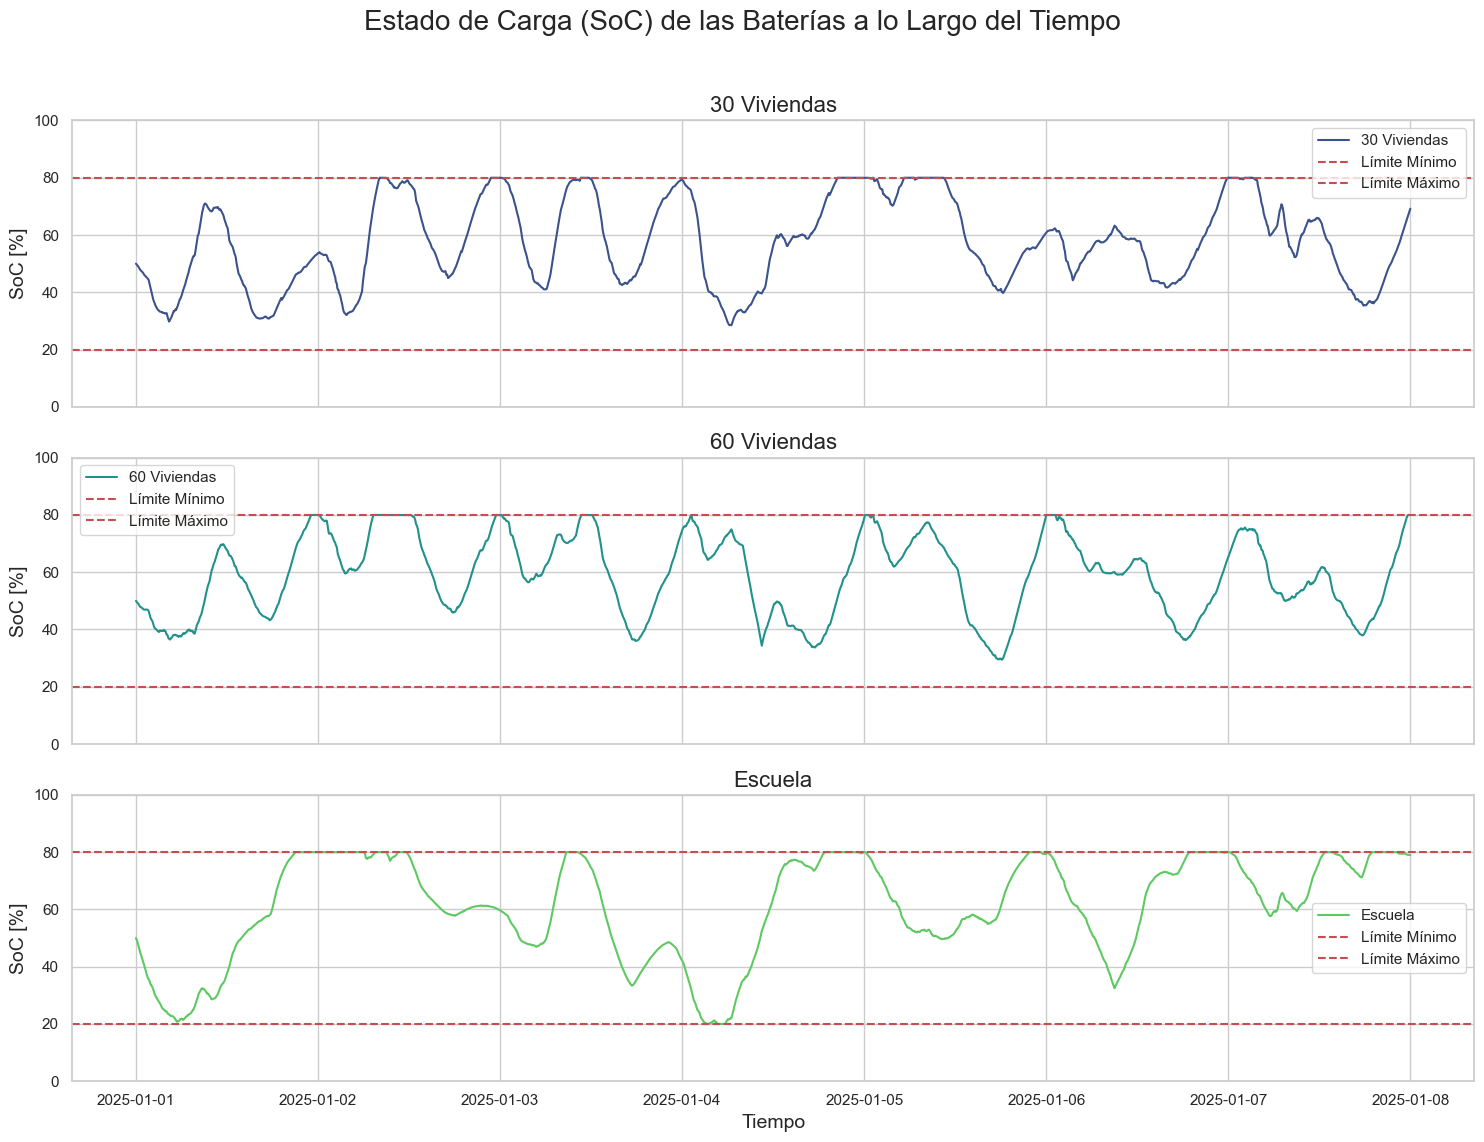

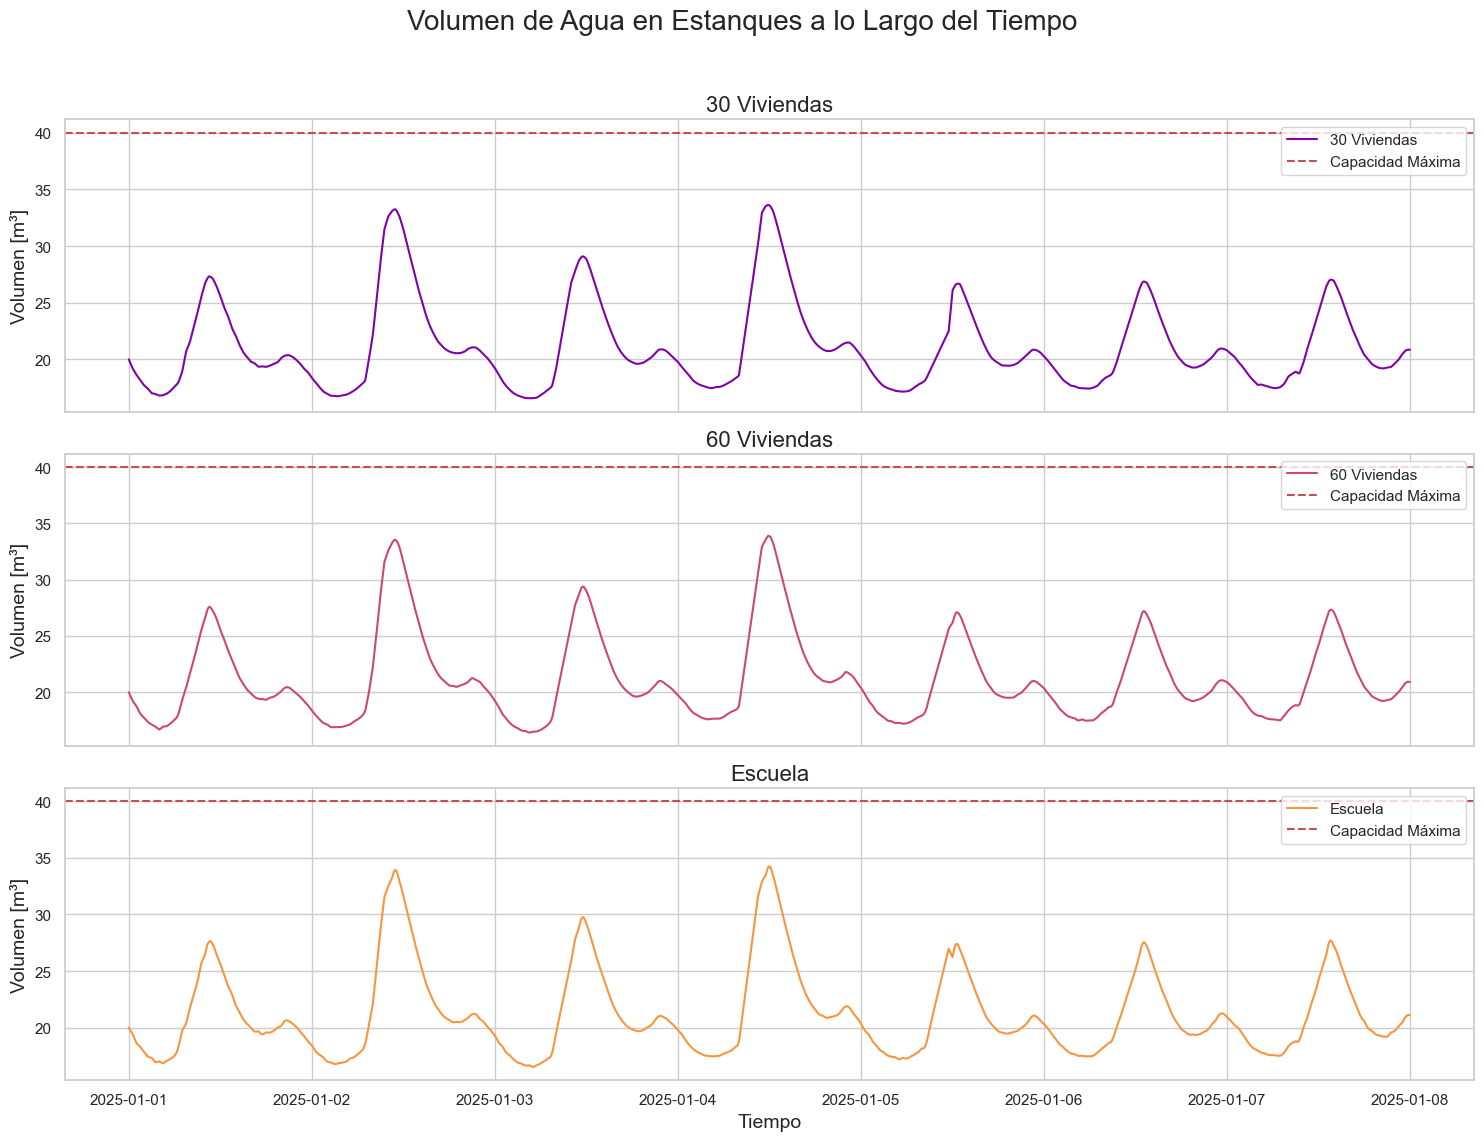

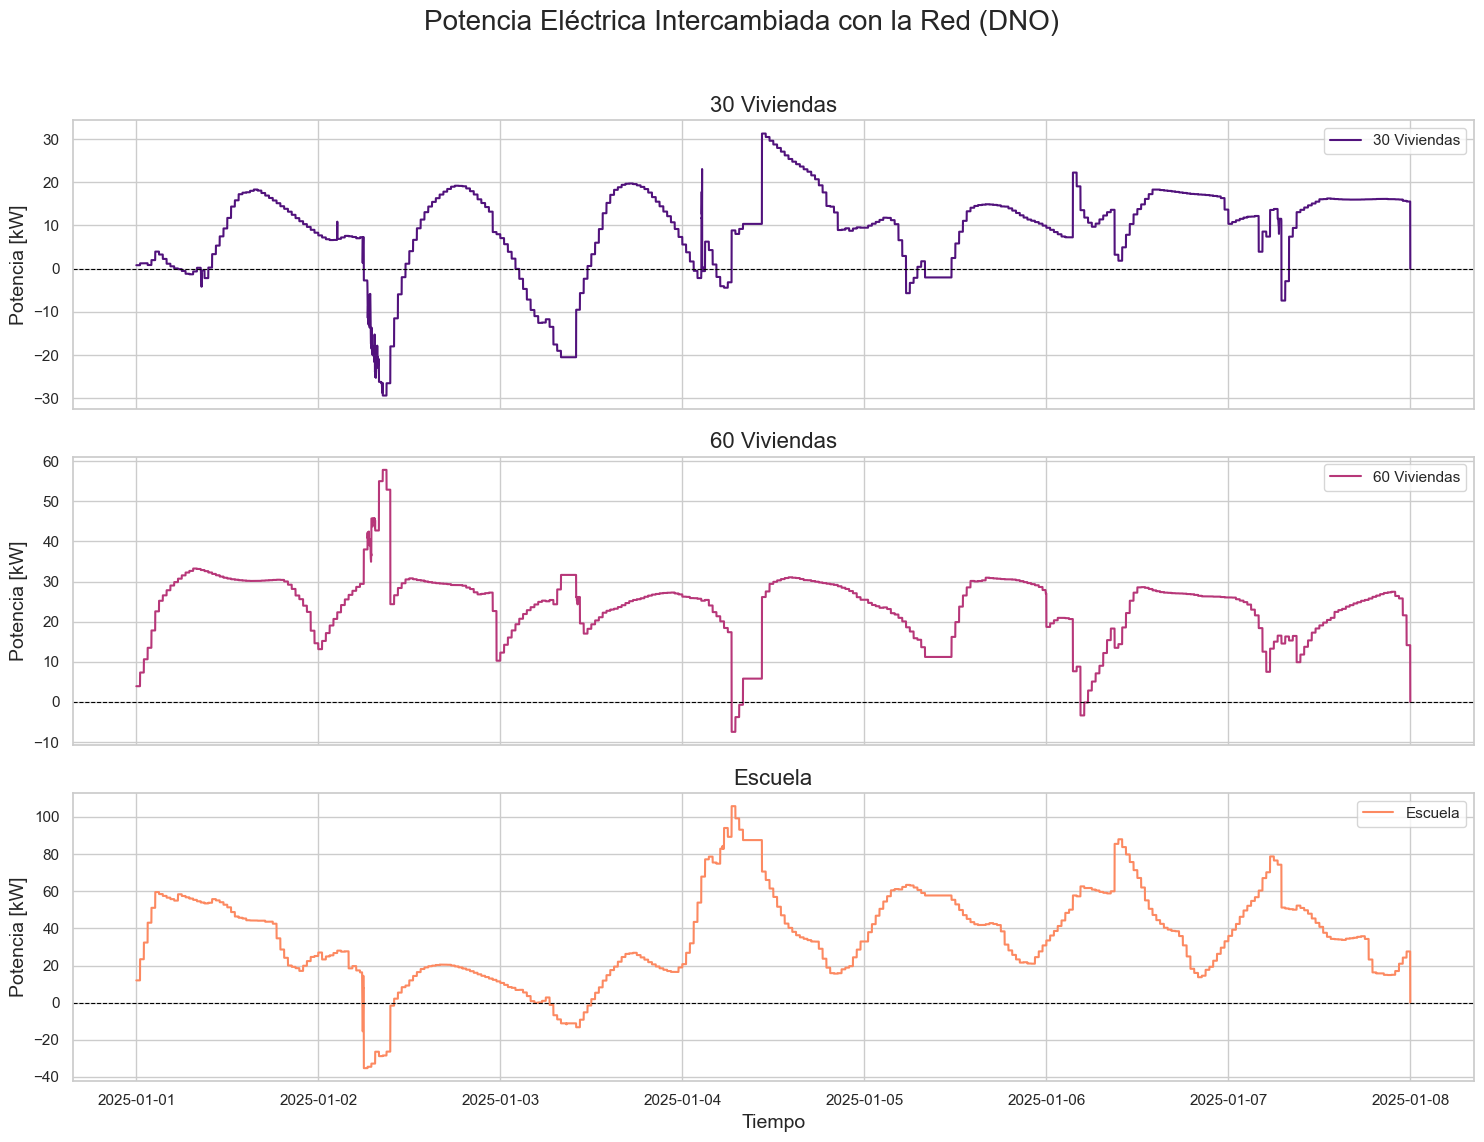

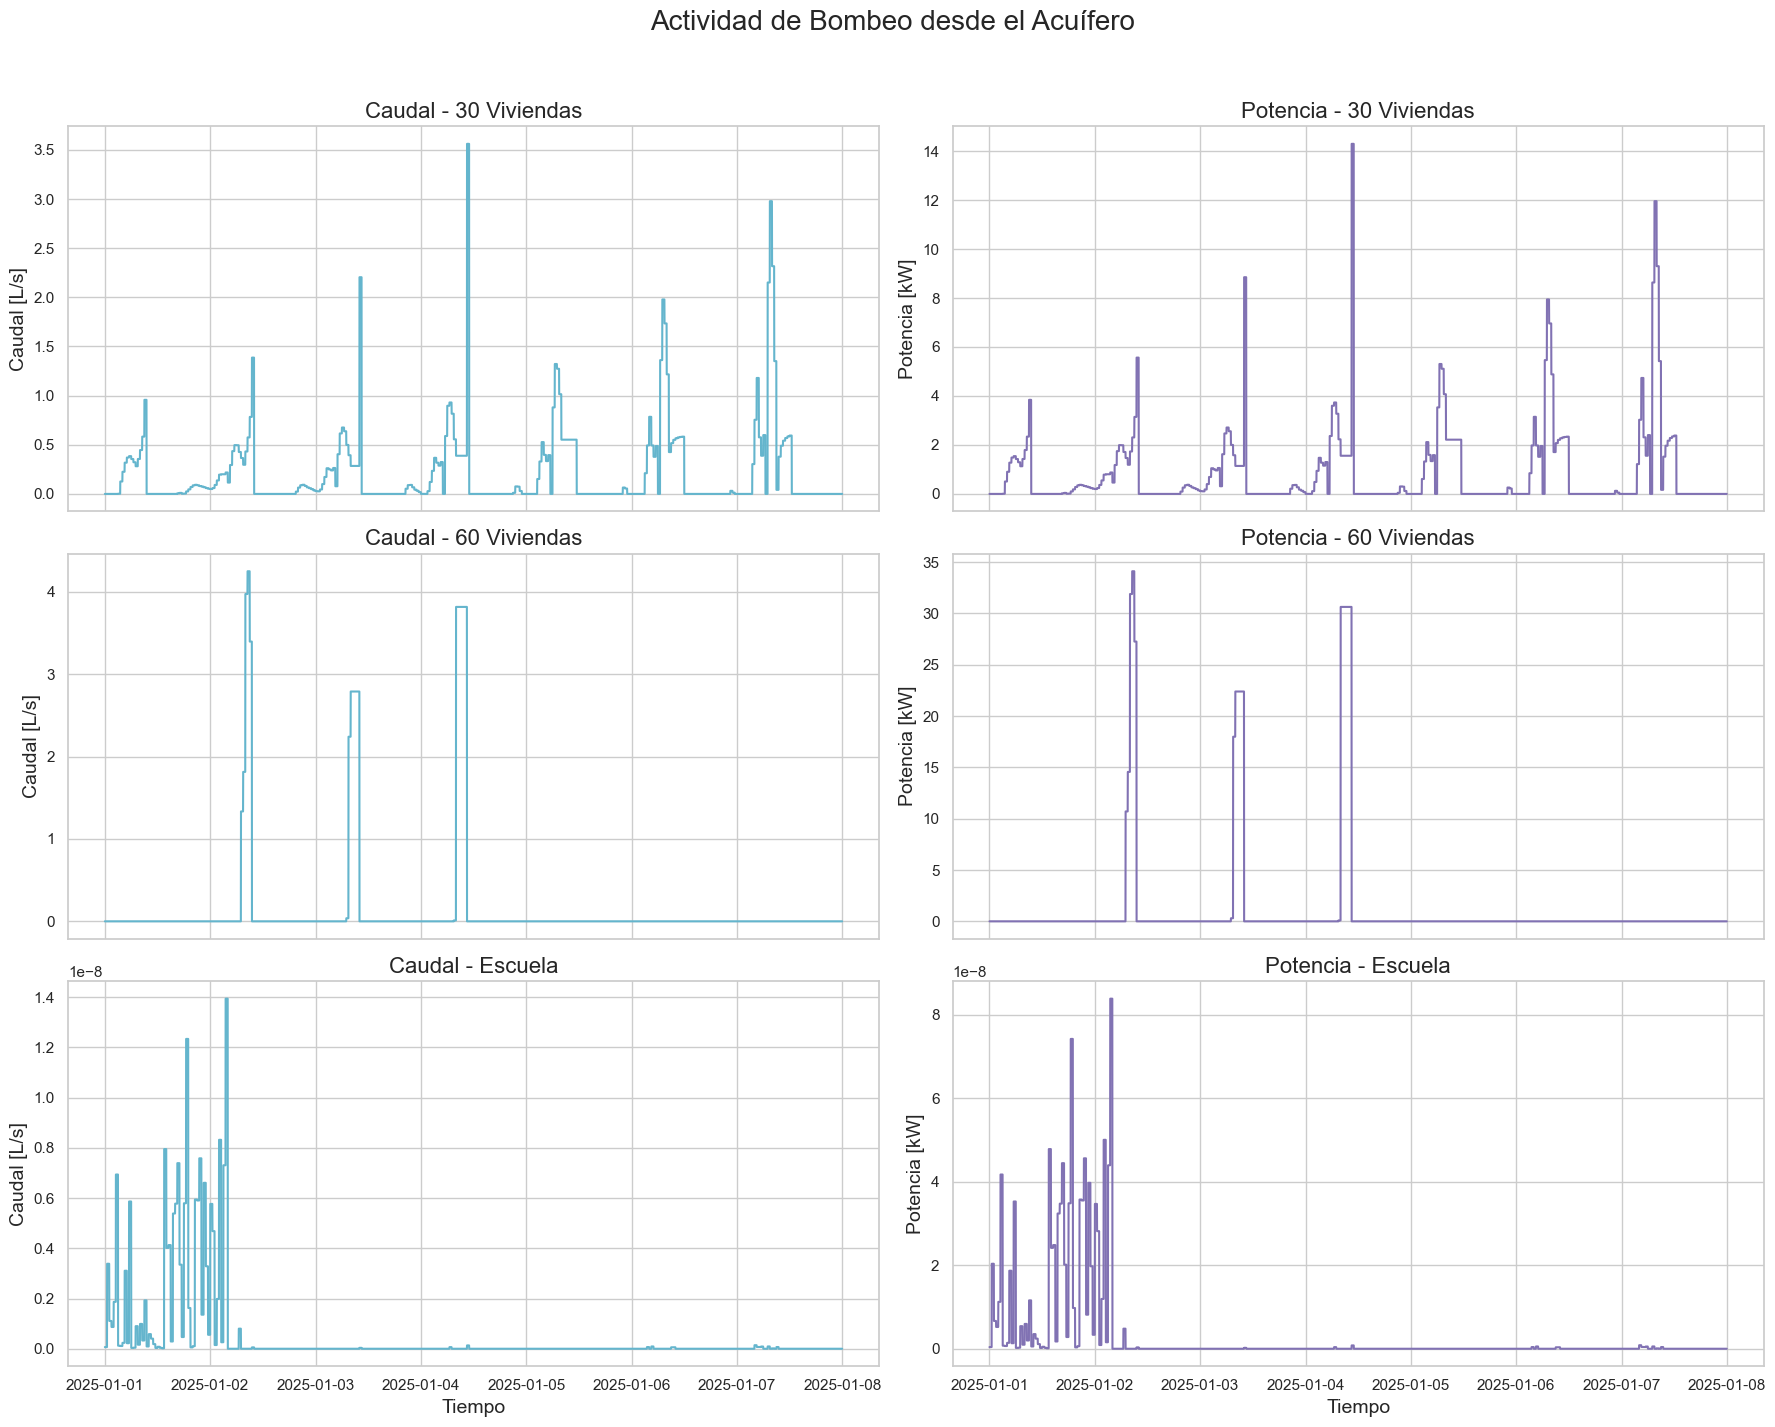

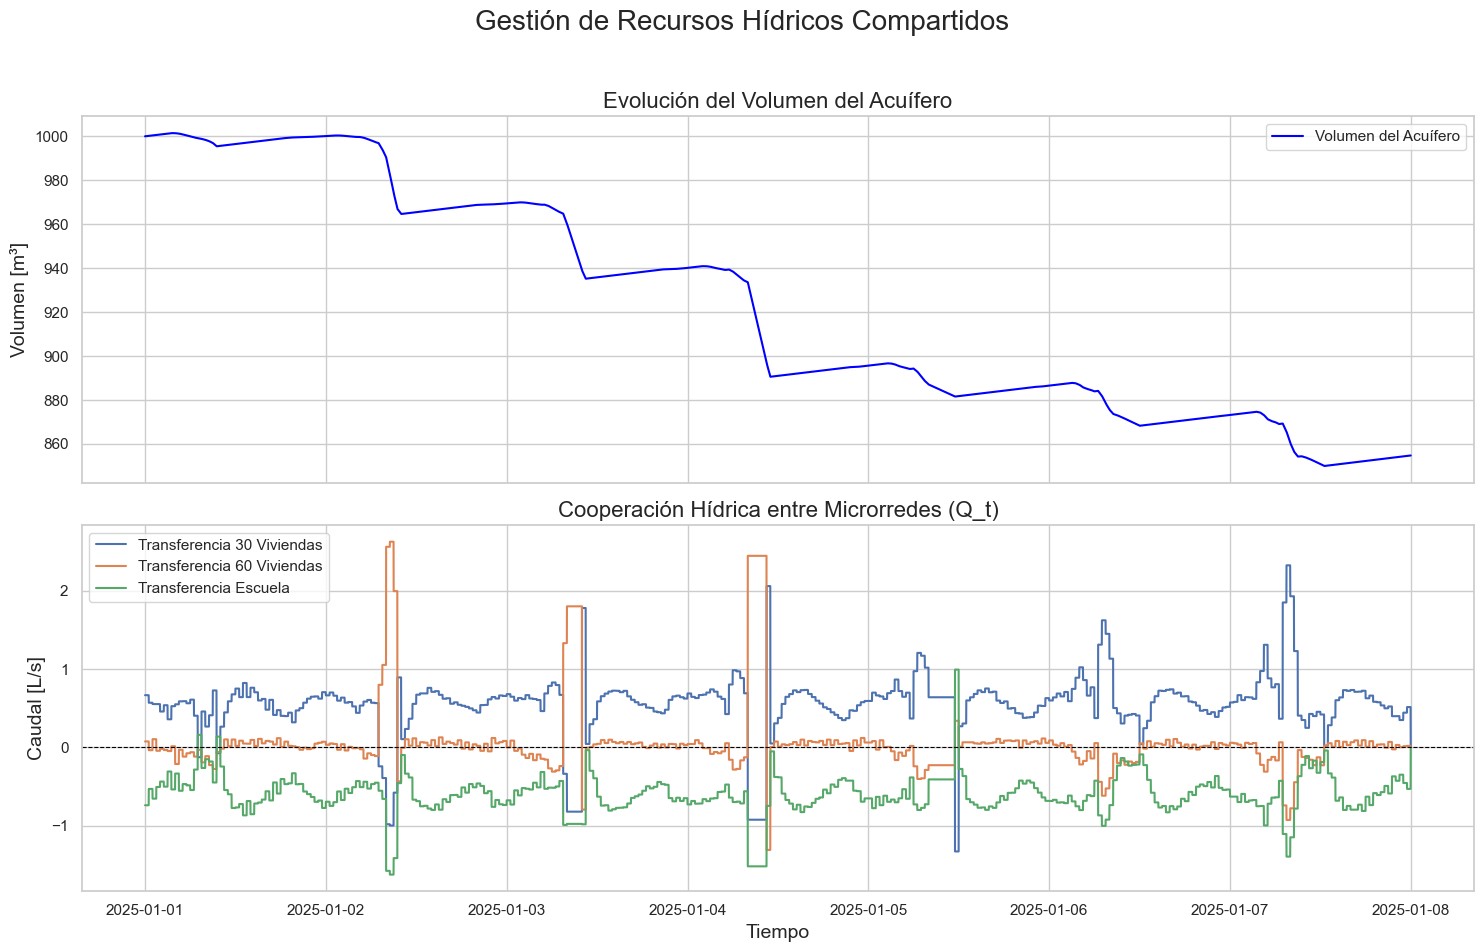

Visualizaciones generadas.

--- 5. Analizando distribuciones de variables clave... ---


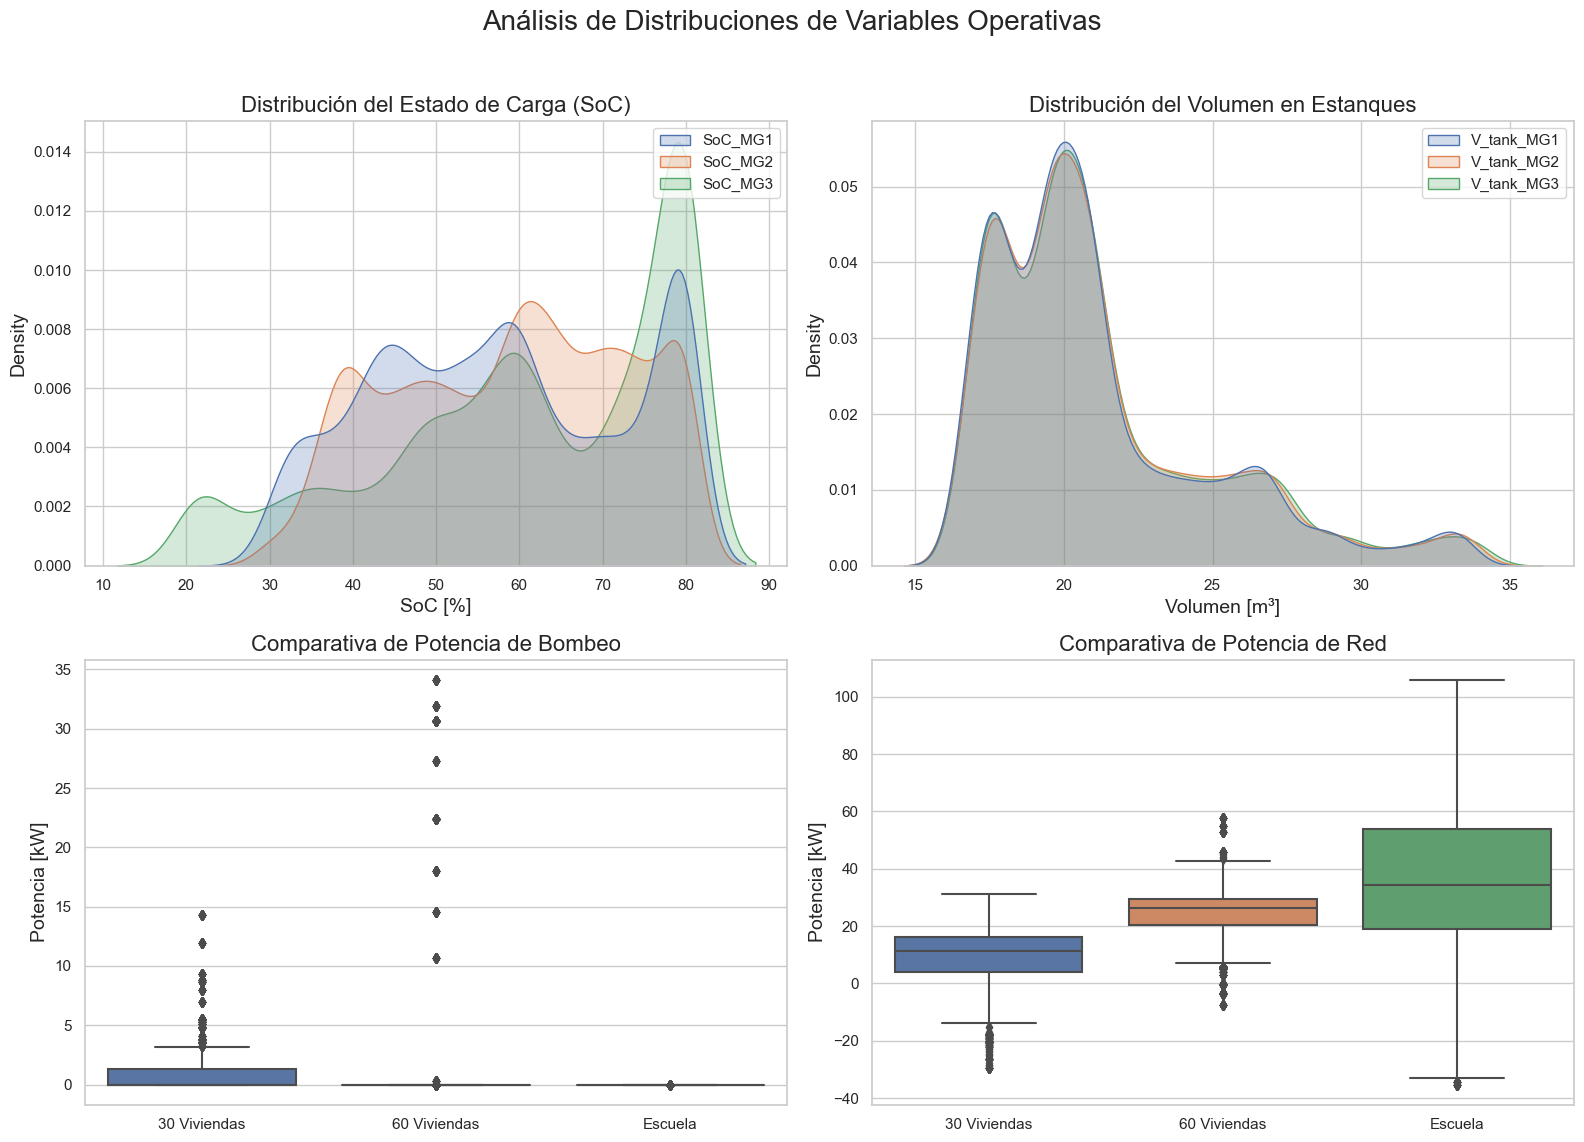

Análisis de distribuciones completado.

--- 6. Calculando matriz de correlación... ---


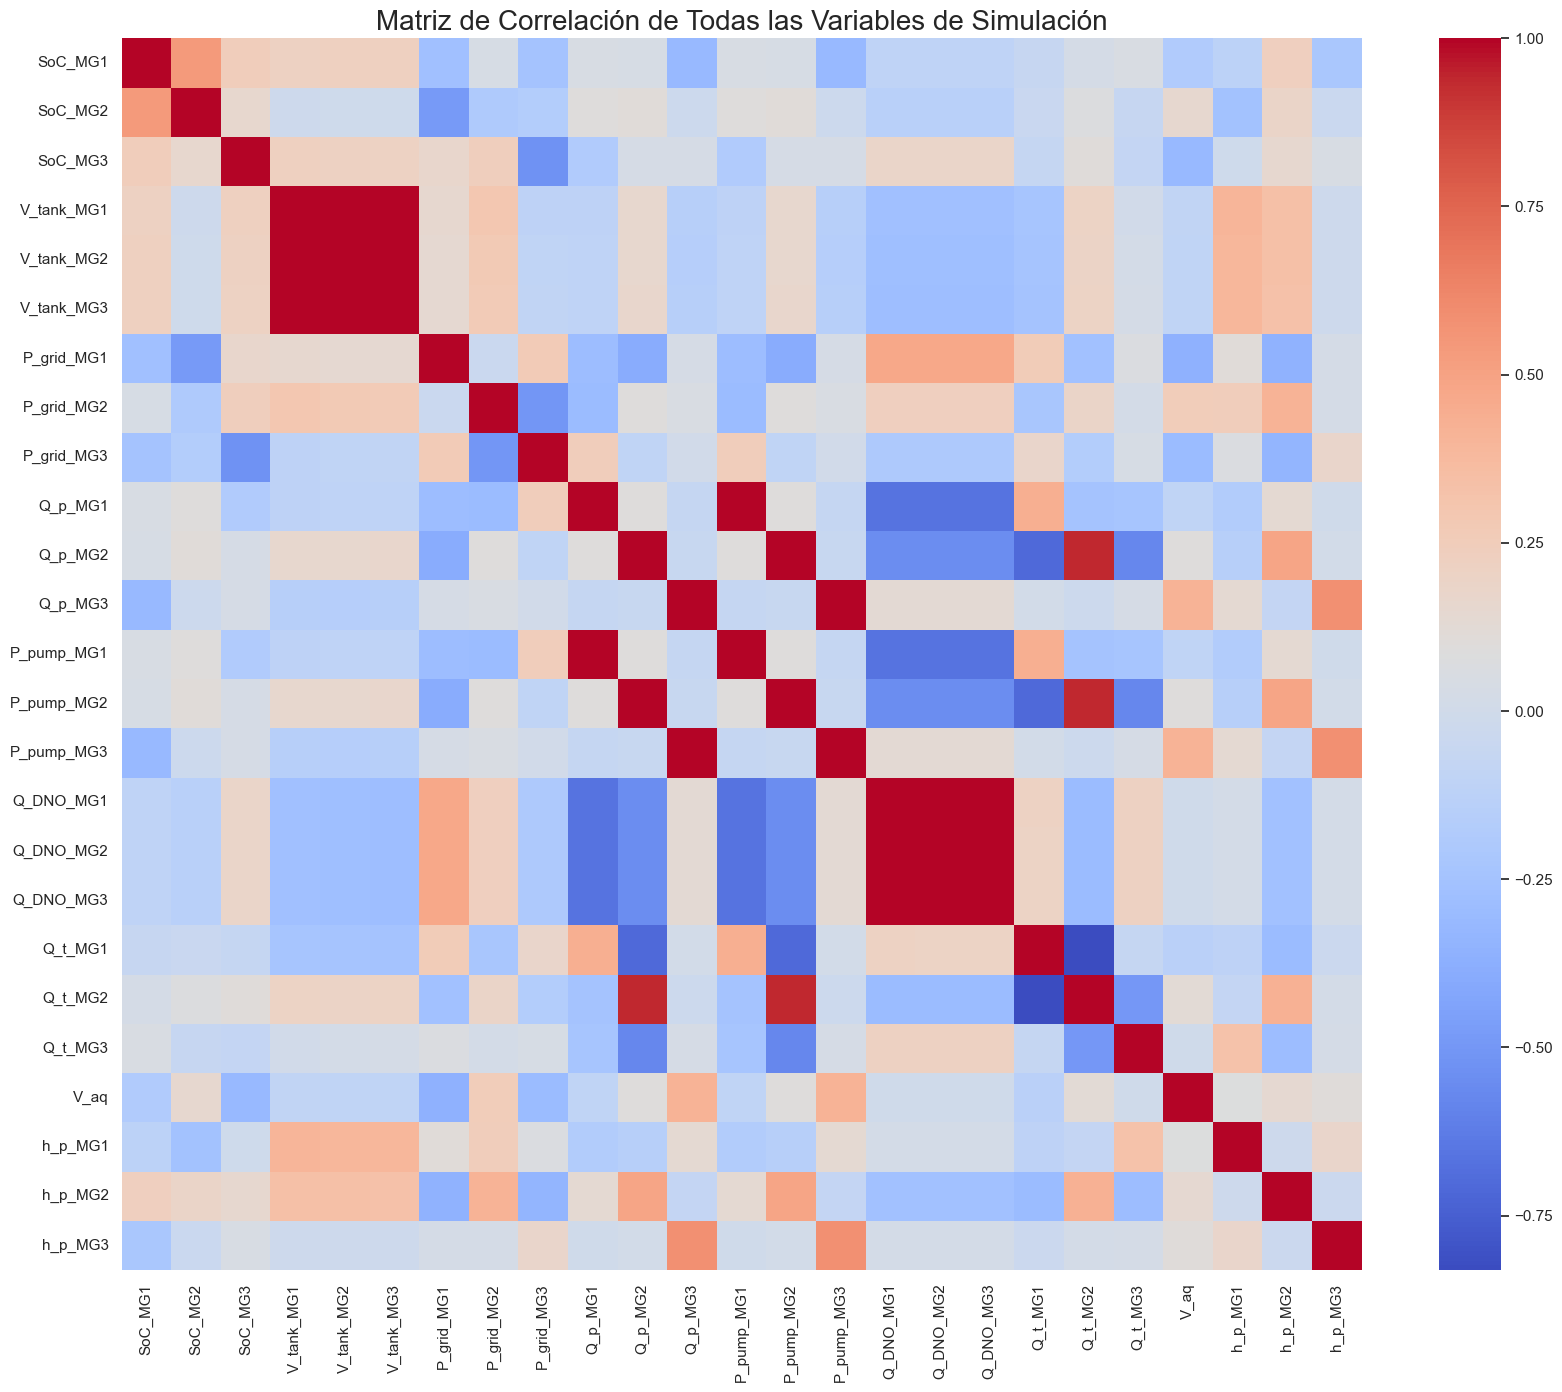

Correlaciones más fuertes con el Caudal de Bombeo de la MG2 (60 Viviendas):
Q_p_MG2      1.00
P_pump_MG2   1.00
Q_t_MG2      0.94
Q_t_MG1      0.71
Q_t_MG3      0.57
Q_DNO_MG3    0.55
Q_DNO_MG2    0.55
Q_DNO_MG1    0.55
h_p_MG2      0.49
P_grid_MG1   0.39
Name: Q_p_MG2, dtype: float64


--- 7. Realizando análisis específicos del dominio... ---


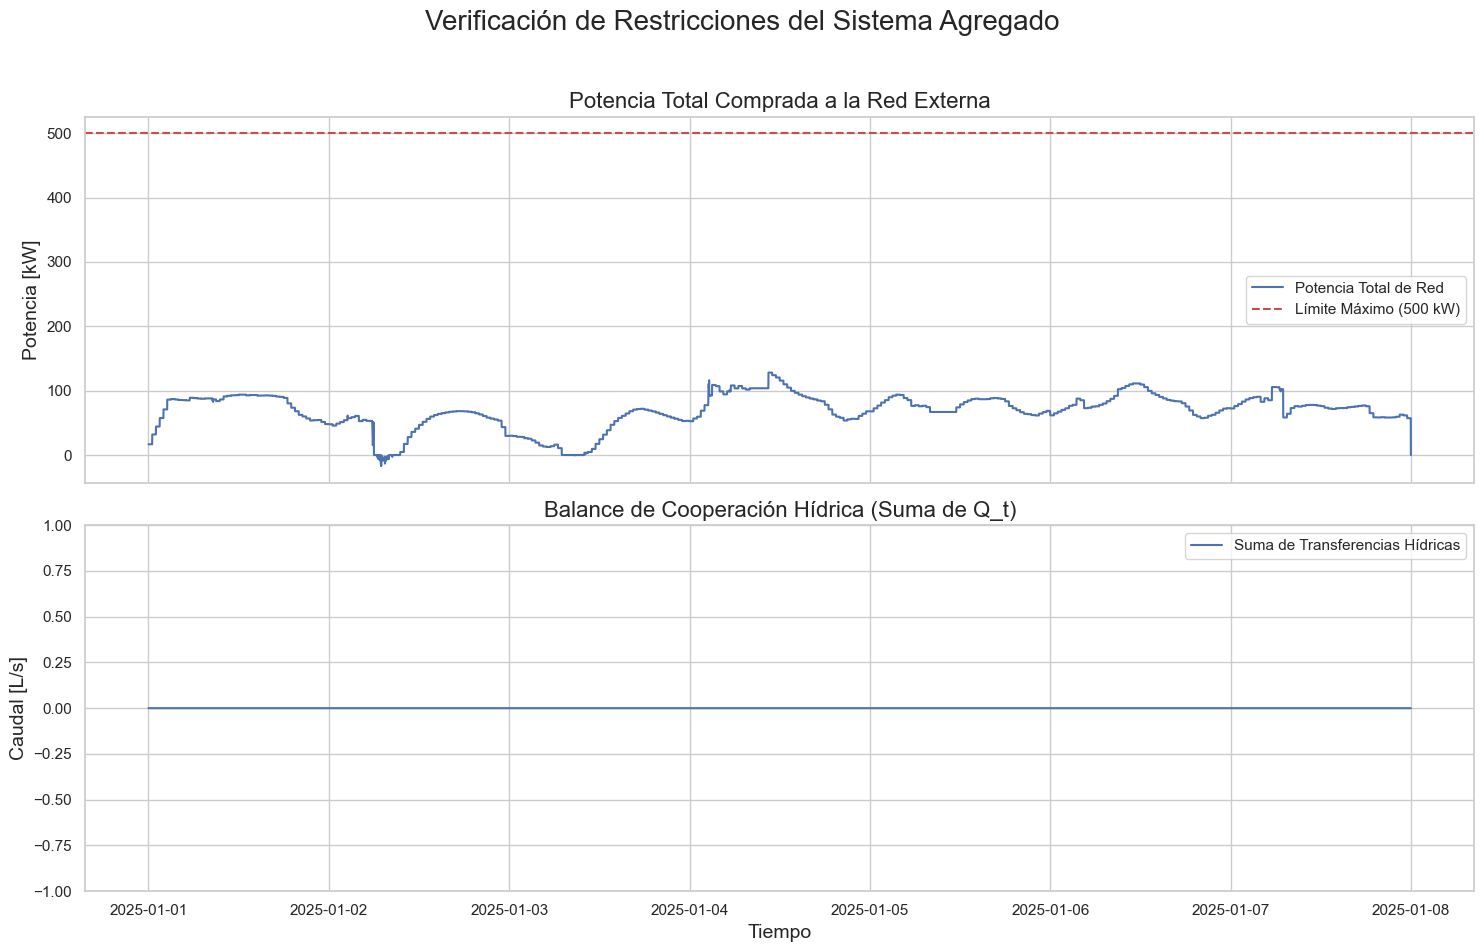

Verificación del balance de agua (Q_t): Máximo desbalance = 9.8765e-12 L/s (esperado ≈ 0)


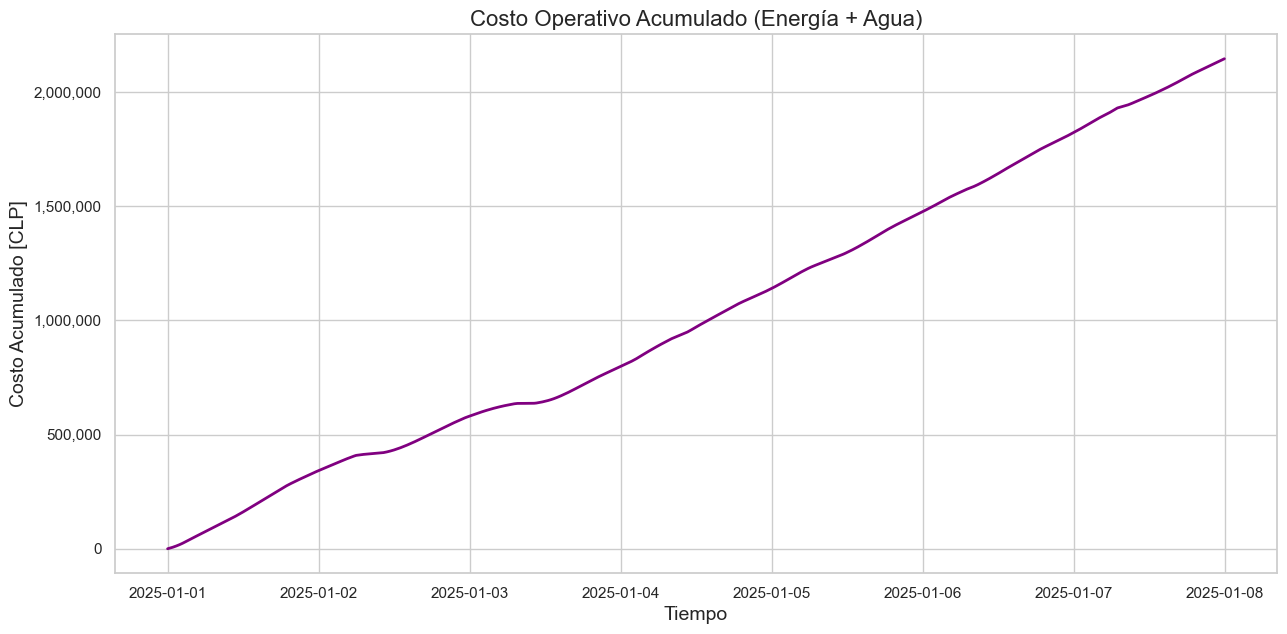

Costo operativo total al final de la simulación: $2,144,181 CLP




In [3]:
# =============================================================================
# # ANÁLISIS EXPLORATORIO DE DATOS (EDA) - RESULTADOS SIMULACIÓN MPC
# =============================================================================
#
# Objetivo: Realizar un análisis completo de los datos generados por la
# simulación 'main_mpc.m', contenidos en 'resultados_mpc_3mg_7dias.mat'.
#
# Autor: Dr. Gemini - Ingeniero Eléctrico Investigador
#
# Estructura del Notebook:
# 1.  Configuración e Importación de Librerías
# 2.  Carga y Estructuración de Datos
# 3.  Estadísticas Descriptivas
# 4.  Análisis de Series Temporales (Visualización)
# 5.  Análisis de Distribuciones
# 6.  Análisis de Correlaciones
# 7.  Análisis Específicos del Dominio (Costos y Restricciones)
# 8.  Conclusiones del EDA
#
# =============================================================================

# %% --- 1. CONFIGURACIÓN E IMPORTACIÓN DE LIBRERÍAS ---
# -----------------------------------------------------------------------------
print("--- 1. Importando librerías... ---")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import warnings

# Configuraciones de visualización
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
warnings.filterwarnings('ignore')
print("Librerías importadas correctamente.\n")


# %% --- 2. CARGA Y ESTRUCTURACIÓN DE DATOS ---
# -----------------------------------------------------------------------------
print("--- 2. Cargando y estructurando datos... ---")
# Cargar el archivo .mat
try:
    mat_data = loadmat('results_mpc/resultados_mpc_3mg_7dias.mat')
    print("Archivo 'resultados_mpc_3mg_7dias.mat' cargado.")
except FileNotFoundError:
    print("\nERROR: No se encontró el archivo 'resultados_mpc/resultados_mpc_3mg_7dias.mat'.")
    print("Por favor, asegúrese de que el archivo esté en la carpeta 'results_mpc' relativa a su notebook.\n")
    # Detener la ejecución si no se encuentra el archivo
    # En un notebook, la celda simplemente fallará aquí.
    raise

# Extraer los nombres de las microrredes para las leyendas
mg_struct = mat_data['mg']
mg_names = [mg_struct[0, i]['nombre'][0] for i in range(mg_struct.shape[1])]

# Extraer parámetros clave de la simulación
Ts_sim_seconds = mat_data['mg'][0, 0]['Ts_sim'][0, 0]
num_timesteps = mat_data['SoC'].shape[0]

start_time = pd.Timestamp('2025-01-01 00:00:00')
time_index = start_time + pd.to_timedelta(np.arange(num_timesteps) * Ts_sim_seconds, unit='s')

# Crear un DataFrame de Pandas para un manejo más sencillo
data = {
    'SoC_MG1': mat_data['SoC'][:, 0] * 100,
    'SoC_MG2': mat_data['SoC'][:, 1] * 100,
    'SoC_MG3': mat_data['SoC'][:, 2] * 100,
    'V_tank_MG1': mat_data['V_tank'][:, 0] / 1000, # m³
    'V_tank_MG2': mat_data['V_tank'][:, 1] / 1000, # m³
    'V_tank_MG3': mat_data['V_tank'][:, 2] / 1000, # m³
    'P_grid_MG1': mat_data['P_grid'][:, 0],
    'P_grid_MG2': mat_data['P_grid'][:, 1],
    'P_grid_MG3': mat_data['P_grid'][:, 2],
    'Q_p_MG1': mat_data['Q_p'][:, 0],
    'Q_p_MG2': mat_data['Q_p'][:, 1],
    'Q_p_MG3': mat_data['Q_p'][:, 2],
    'P_pump_MG1': mat_data['P_pump'][:, 0],
    'P_pump_MG2': mat_data['P_pump'][:, 1],
    'P_pump_MG3': mat_data['P_pump'][:, 2],
    'Q_DNO_MG1': mat_data['Q_DNO'][:, 0],
    'Q_DNO_MG2': mat_data['Q_DNO'][:, 1],
    'Q_DNO_MG3': mat_data['Q_DNO'][:, 2],
    'Q_t_MG1': mat_data['Q_t'][:, 0],
    'Q_t_MG2': mat_data['Q_t'][:, 1],
    'Q_t_MG3': mat_data['Q_t'][:, 2],
    'V_aq': mat_data['V_aq'].flatten() / 1000, # m³
    'h_p_MG1': mat_data['h_p'][:, 0],
    'h_p_MG2': mat_data['h_p'][:, 1],
    'h_p_MG3': mat_data['h_p'][:, 2],
}
df = pd.DataFrame(data, index=time_index)

print("DataFrame creado con éxito.")
print(f"Dimensiones del DataFrame: {df.shape}")
print("Primeras 5 filas de datos:")
print(df.head())
print("\n")


# %% --- 3. ESTADÍSTICAS DESCRIPTIVAS ---
# -----------------------------------------------------------------------------
print("--- 3. Calculando estadísticas descriptivas... ---")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
descriptive_stats = df.describe()
print(descriptive_stats)
print("\n")

# %% --- 4. ANÁLISIS DE SERIES TEMPORALES (VISUALIZACIÓN) ---
# -----------------------------------------------------------------------------
print("--- 4. Generando visualizaciones de series temporales... ---")

# 4.1. Estado de Carga (SoC) de las Baterías
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Estado de Carga (SoC) de las Baterías a lo Largo del Tiempo', fontsize=20)
for i in range(3):
    col = f'SoC_MG{i+1}'
    axes[i].plot(df.index, df[col], label=mg_names[i], color=sns.color_palette("viridis", 3)[i])
    axes[i].axhline(y=mat_data['mg'][0, i]['SoC_min'][0, 0]*100, color='r', linestyle='--', label='Límite Mínimo')
    axes[i].axhline(y=mat_data['mg'][0, i]['SoC_max'][0, 0]*100, color='r', linestyle='--', label='Límite Máximo')
    axes[i].set_ylabel('SoC [%]')
    axes[i].set_ylim(0, 100)
    axes[i].legend()
    axes[i].set_title(mg_names[i])
axes[-1].set_xlabel('Tiempo')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 4.2. Volumen de Agua en Estanques
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Volumen de Agua en Estanques a lo Largo del Tiempo', fontsize=20)
for i in range(3):
    col = f'V_tank_MG{i+1}'
    axes[i].plot(df.index, df[col], label=mg_names[i], color=sns.color_palette("plasma", 3)[i])
    axes[i].axhline(y=mat_data['mg'][0, i]['V_max'][0, 0]/1000, color='r', linestyle='--', label='Capacidad Máxima')
    axes[i].set_ylabel('Volumen [m³]')
    axes[i].legend()
    axes[i].set_title(mg_names[i])
axes[-1].set_xlabel('Tiempo')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 4.3. Potencia Intercambiada con la Red (P_grid)
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Potencia Eléctrica Intercambiada con la Red (DNO)', fontsize=20)
for i in range(3):
    col = f'P_grid_MG{i+1}'
    axes[i].plot(df.index, df[col], label=mg_names[i], color=sns.color_palette("magma", 3)[i])
    axes[i].set_ylabel('Potencia [kW]')
    axes[i].axhline(0, color='black', linestyle='--', lw=0.8)
    axes[i].legend()
    axes[i].set_title(mg_names[i])
axes[-1].set_xlabel('Tiempo')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 4.4. Caudal de Bombeo (Q_p) y Potencia de Bombeo (P_pump)
fig, axes = plt.subplots(3, 2, figsize=(18, 15), sharex=True)
fig.suptitle('Actividad de Bombeo desde el Acuífero', fontsize=20)
for i in range(3):
    # Caudal de Bombeo
    ax1 = axes[i, 0]
    ax1.plot(df.index, df[f'Q_p_MG{i+1}'], color='c', label=f'Caudal Bombeo {mg_names[i]}')
    ax1.set_ylabel('Caudal [L/s]')
    ax1.set_title(f'Caudal - {mg_names[i]}')
    
    # Potencia de Bombeo
    ax2 = axes[i, 1]
    ax2.plot(df.index, df[f'P_pump_MG{i+1}'], color='m', label=f'Potencia Bombeo {mg_names[i]}')
    ax2.set_ylabel('Potencia [kW]')
    ax2.set_title(f'Potencia - {mg_names[i]}')

axes[-1, 0].set_xlabel('Tiempo')
axes[-1, 1].set_xlabel('Tiempo')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 4.5. Recursos Compartidos: Acuífero y Cooperación Hídrica
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Gestión de Recursos Hídricos Compartidos', fontsize=20)
# Volumen del Acuífero
axes[0].plot(df.index, df['V_aq'], color='blue', label='Volumen del Acuífero')
axes[0].set_ylabel('Volumen [m³]')
axes[0].set_title('Evolución del Volumen del Acuífero')
axes[0].legend()
# Cooperación Hídrica (Q_t)
for i in range(3):
    axes[1].plot(df.index, df[f'Q_t_MG{i+1}'], label=f'Transferencia {mg_names[i]}')
axes[1].axhline(0, color='black', linestyle='--', lw=0.8)
axes[1].set_ylabel('Caudal [L/s]')
axes[1].set_title('Cooperación Hídrica entre Microrredes (Q_t)')
axes[1].legend()
axes[1].set_xlabel('Tiempo')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

print("Visualizaciones generadas.\n")


# %% --- 5. ANÁLISIS DE DISTRIBUCIONES ---
# -----------------------------------------------------------------------------
print("--- 5. Analizando distribuciones de variables clave... ---")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Distribuciones de Variables Operativas', fontsize=20)

# Distribución de SoC
sns.kdeplot(data=df[['SoC_MG1', 'SoC_MG2', 'SoC_MG3']], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Distribución del Estado de Carga (SoC)')
axes[0, 0].set_xlabel('SoC [%]')

# Distribución de Volumen en Tanques
sns.kdeplot(data=df[['V_tank_MG1', 'V_tank_MG2', 'V_tank_MG3']], ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Distribución del Volumen en Estanques')
axes[0, 1].set_xlabel('Volumen [m³]')

# Boxplot de Potencia de Bombeo
pump_power_df = df[['P_pump_MG1', 'P_pump_MG2', 'P_pump_MG3']]
pump_power_df.columns = mg_names
sns.boxplot(data=pump_power_df, ax=axes[1, 0])
axes[1, 0].set_title('Comparativa de Potencia de Bombeo')
axes[1, 0].set_ylabel('Potencia [kW]')

# Boxplot de Potencia de Red
grid_power_df = df[['P_grid_MG1', 'P_grid_MG2', 'P_grid_MG3']]
grid_power_df.columns = mg_names
sns.boxplot(data=grid_power_df, ax=axes[1, 1])
axes[1, 1].set_title('Comparativa de Potencia de Red')
axes[1, 1].set_ylabel('Potencia [kW]')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
print("Análisis de distribuciones completado.\n")


# %% --- 6. ANÁLISIS DE CORRELACIONES ---
# -----------------------------------------------------------------------------
print("--- 6. Calculando matriz de correlación... ---")
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Todas las Variables de Simulación', fontsize=20)
plt.show()

# Correlaciones más relevantes con el bombeo de la MG2 (Escuela)
print("Correlaciones más fuertes con el Caudal de Bombeo de la MG2 (60 Viviendas):")
print(correlation_matrix['Q_p_MG2'].abs().sort_values(ascending=False).head(10))
print("\n")


# %% --- 7. ANÁLISIS ESPECÍFICOS DEL DOMINIO ---
# -----------------------------------------------------------------------------
print("--- 7. Realizando análisis específicos del dominio... ---")

# 7.1. Verificación de Restricciones Agregadas
# Suma de potencias de red
df['P_grid_Total'] = df['P_grid_MG1'] + df['P_grid_MG2'] + df['P_grid_MG3']
p_grid_max = mat_data['mg'][0, 0]['P_grid_max'][0, 0]

# Suma de transferencias de agua
df['Q_t_Total_Check'] = df['Q_t_MG1'] + df['Q_t_MG2'] + df['Q_t_MG3']

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Verificación de Restricciones del Sistema Agregado', fontsize=20)
axes[0].plot(df.index, df['P_grid_Total'], label='Potencia Total de Red')
axes[0].axhline(p_grid_max, color='r', linestyle='--', label=f'Límite Máximo ({p_grid_max} kW)')
axes[0].set_title('Potencia Total Comprada a la Red Externa')
axes[0].set_ylabel('Potencia [kW]')
axes[0].legend()

axes[1].plot(df.index, df['Q_t_Total_Check'], label='Suma de Transferencias Hídricas')
axes[1].set_title('Balance de Cooperación Hídrica (Suma de Q_t)')
axes[1].set_ylabel('Caudal [L/s]')
axes[1].set_ylim(-1, 1) # Para visualizar desviaciones numéricas pequeñas
axes[1].legend()
axes[1].set_xlabel('Tiempo')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

print(f"Verificación del balance de agua (Q_t): Máximo desbalance = {df['Q_t_Total_Check'].abs().max():.4e} L/s (esperado ≈ 0)")

# 7.2. Cálculo de Costo Operativo Acumulado
C_p = 110  # Costo Energía [CLP/kWh]
C_q = 644  # Costo Agua [CLP/m³]
Ts_sim_hours = Ts_sim_seconds / 3600

# Costo instantáneo
df['costo_energia'] = df['P_grid_Total'] * Ts_sim_hours * C_p
df['costo_agua'] = (df['Q_DNO_MG1'] + df['Q_DNO_MG2'] + df['Q_DNO_MG3']) * Ts_sim_seconds / 1000 * C_q

# Costo acumulado
df['costo_total_acumulado'] = (df['costo_energia'] + df['costo_agua']).cumsum()

plt.figure(figsize=(15, 7))
plt.plot(df.index, df['costo_total_acumulado'], color='purple', lw=2)
plt.title('Costo Operativo Acumulado (Energía + Agua)')
plt.xlabel('Tiempo')
plt.ylabel('Costo Acumulado [CLP]')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()
print(f"Costo operativo total al final de la simulación: ${df['costo_total_acumulado'].iloc[-1]:,.0f} CLP")
print("\n")


# =============================================================================
# # FIN DEL SCRIPT DE ANÁLISIS
# =============================================================================